In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras.callbacks import EarlyStopping
%matplotlib inline

In [2]:
df = pd.read_csv('RSCCASN.csv', parse_dates=True, index_col = 'DATE')

In [3]:
df.head()

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


In [4]:
df.columns = ['sales']

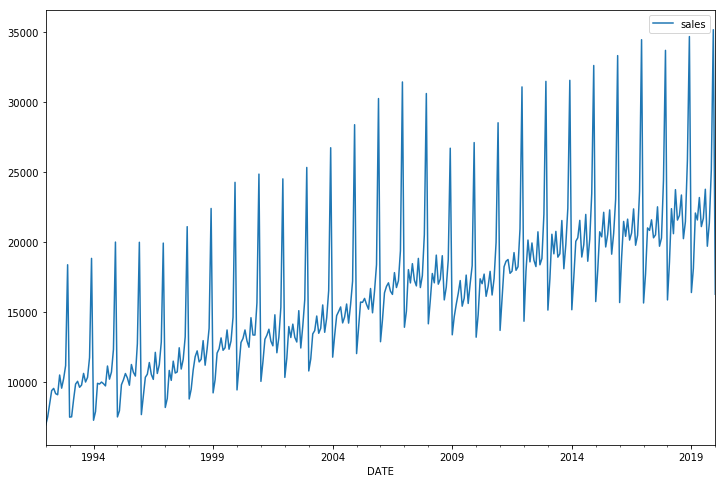

In [5]:
df.plot(figsize = [12, 8])

In [6]:
test_size = 18
test_index = len(df) - test_size

In [7]:
train = df.iloc[:test_index]
test = df.iloc[test_index:]

In [8]:
scaler = MinMaxScaler()

In [9]:
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [10]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [11]:
length = 12
generator = TimeseriesGenerator(scaled_train, scaled_train , length=length, batch_size=1)

In [12]:
n_features = 1

In [ ]:
model = Sequential()

In [ ]:
model.add(LSTM(100,activation='relu', input_shape=[length,n_features]))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [ ]:
validaion_generator = TimeseriesGenerator(scaled_test, scaled_test, length=length, batch_size=1)

In [ ]:
model.fit_generator(generator, epochs=20, validation_data=validaion_generator, callbacks = [early_stop])

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses.plot()

In [ ]:
test_predictions = []
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):
    current_predict = model.predict(current_batch)[0]
    test_predictions.append(current_predict)
    current_batch = np.append(current_batch[:,1:,:],[[current_predict]] ,axis = 1)

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
test['predictions'] = true_predictions

In [ ]:
test

In [ ]:
test.plot(figsize = (12,8))

In [13]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [15]:
scaled_full_data.shape

(337, 1)

In [14]:
generator = TimeseriesGenerator(scaled_full_data,scaled_full_data, length=length, batch_size=1)

In [ ]:
model = Sequential()
model.add(LSTM(50, input_shape=(length,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.fit_generator(generator, epochs=20)

In [ ]:
test_predictions = []
periods = 12
#first_eval_batch = scaled_train[-length:]
first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(periods):
    current_predict = model.predict(current_batch)[0]
    test_predictions.append(current_predict)
    current_batch = np.append(current_batch[:,1:,:],[[current_predict]] ,axis = 1)

In [ ]:
forecast_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
df

In [ ]:
forecast_predictions

In [ ]:
forecast_index = pd.date_range(start = '2020-02-01', periods= periods, freq="MS")

In [ ]:
forecast_index

In [ ]:
forecast = pd.DataFrame(data = forecast_predictions, index = forecast_index, columns=['forecast'])

In [ ]:
forecast.plot()

In [ ]:
ax = df.plot(figsize=[12, 8])
forecast.plot(ax=ax)
plt.xlim('2019-01-01','2021-03-01')